In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from google.colab import files

##Center and Spread and the Normal Distribution

In [4]:
#Let's create an array
values = np.array([2,3,3,9])
values

array([2, 3, 3, 9])

In [5]:
#mean or average
values.mean()

4.25

In [7]:
np.average(values)

4.25

In [8]:
sum(values)/len(values)

4.25

In [9]:
#Standard Deviations
np.std(values)

2.7726341266023544

## Chebyshev's Bounds ##

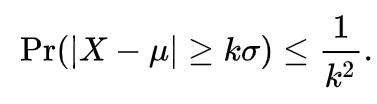

In [10]:
#upload the file baby.csv
uploaded = files.upload()

Saving baby.csv to baby.csv


In [12]:
births = pd.read_csv('baby.csv')
births = births.drop(columns = ['Maternal Smoker'])

In [14]:
births.columns

Index(['Birth Weight', 'Gestational Days', 'Maternal Age', 'Maternal Height',
       'Maternal Pregnancy Weight'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

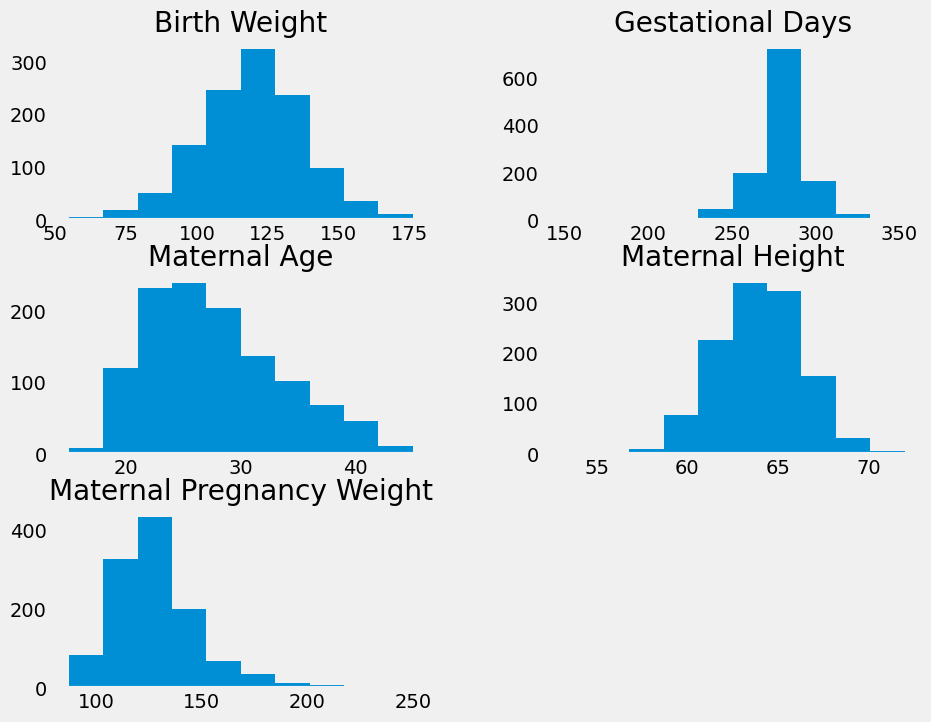

In [17]:
births.hist(bins=10, figsize=(10,8), grid = False)
plots.show

In [18]:
# Extract the 'Maternal Pregnancy Weight' column
mpw = births['Maternal Pregnancy Weight']

# Calculate the mean and standard deviation
ave = np.mean(mpw)
sd = np.std(mpw)

ave, sd

(128.4787052810903, 20.72544970428041)

In [19]:
within_3_SDs = births[(mpw >= ave - 3*sd) & (mpw <= ave +3*sd)]
within_3_SDs

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
0,120,284,27,62,100
1,113,282,33,64,135
2,128,279,28,64,115
3,108,282,23,67,125
4,136,286,25,62,93
...,...,...,...,...,...
1169,113,275,27,60,100
1170,128,265,24,67,120
1171,130,291,30,65,150
1172,125,281,21,65,110


In [22]:
# Proportion within 3 SDs of the mean
within_3_SDs.shape[0] / births.shape[0]


0.9863713798977853

In [23]:
# Chebyshev's bound:
# This proportion should be at least
1 - 1/3**2

0.8888888888888888

In [24]:
births.columns

Index(['Birth Weight', 'Gestational Days', 'Maternal Age', 'Maternal Height',
       'Maternal Pregnancy Weight'],
      dtype='object')

In [25]:
# Iterate over each feature/column in the DataFrame
for feature in births.columns:
    values = births[feature]

    # Check if the column is numeric, since mean and std only apply to numeric data
    if np.issubdtype(values.dtype, np.number):
        mean = np.mean(values)
        sd = np.std(values)

        print(f"\n{feature}")

        # Check proportions for z = 2, 3, 4, 5 standard deviations
        for z in [2, 3, 4, 5]:
            # Filter the DataFrame where values fall within z standard deviations from the mean
            chosen = births[(values >= mean - z * sd) & (values <= mean + z * sd)]

            # Calculate the proportion of rows within the z standard deviations
            proportion = len(chosen) / len(births)
            percent = round(proportion * 100, 2)

            print(f'Average plus or minus {z} SDs: {percent}%')




Birth Weight
Average plus or minus 2 SDs: 94.89%
Average plus or minus 3 SDs: 99.57%
Average plus or minus 4 SDs: 100.0%
Average plus or minus 5 SDs: 100.0%

Gestational Days
Average plus or minus 2 SDs: 93.78%
Average plus or minus 3 SDs: 98.64%
Average plus or minus 4 SDs: 99.57%
Average plus or minus 5 SDs: 99.83%

Maternal Age
Average plus or minus 2 SDs: 94.89%
Average plus or minus 3 SDs: 99.91%
Average plus or minus 4 SDs: 100.0%
Average plus or minus 5 SDs: 100.0%

Maternal Height
Average plus or minus 2 SDs: 97.19%
Average plus or minus 3 SDs: 99.66%
Average plus or minus 4 SDs: 99.91%
Average plus or minus 5 SDs: 100.0%

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06%
Average plus or minus 3 SDs: 98.64%
Average plus or minus 4 SDs: 99.49%
Average plus or minus 5 SDs: 99.91%


## Standard Units ##

In [30]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [29]:
age = births['Maternal Age'].to_numpy()
np.mean(age), np.std(age)

(27.228279386712096, 5.815360404190897)

In [31]:
ages_standard_units = standard_units(age)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [32]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

## The SD and Bell Shaped Curves

In [ ]:
#upload the file baby.csv
#uploaded = files.upload()

In [33]:
births = pd.read_csv('baby.csv')


array([[<Axes: title={'center': 'Maternal Height'}>]], dtype=object)

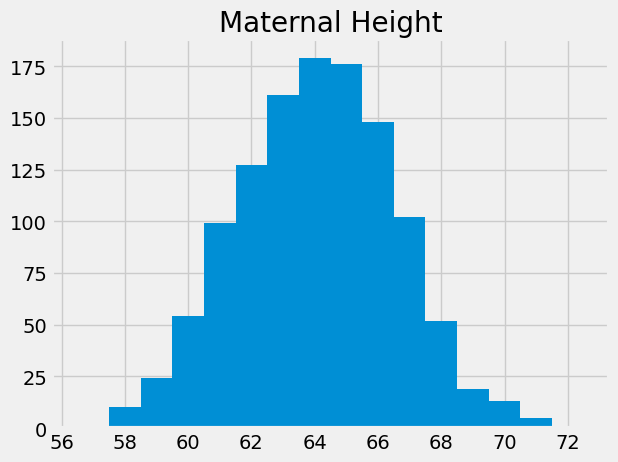

In [35]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [36]:
heights = births['Maternal Height']
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [37]:
np.mean(heights) - np.std(heights) , np.mean(heights) + np.std(heights)

(61.52437830690309, 66.57442918883797)

## Central Limit Theorem ##

In [38]:
#upload the file united.csv
uploaded = files.upload()

Saving united.csv to united.csv


In [39]:
united = pd.read_csv('united.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


array([[<Axes: title={'center': 'Delay'}>]], dtype=object)

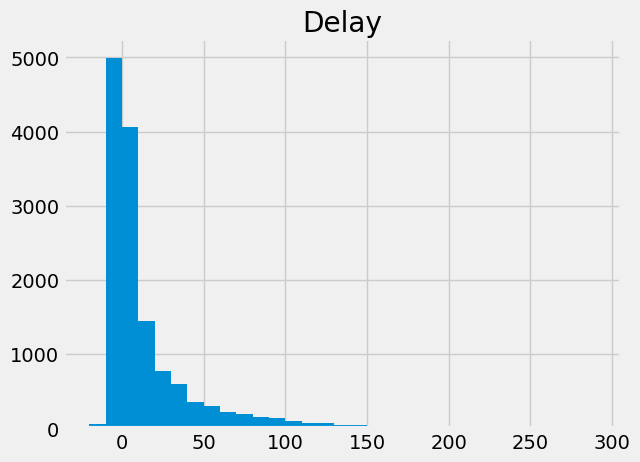

In [40]:
united_bins = np.arange(-20,300,10)
united.hist('Delay', bins=united_bins)

In [41]:
delays = united['Delay']
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [42]:
percentile_50 = delays.quantile(0.5)
percentile_50

2.0

In [44]:
def one_sample_mean(sample_size):
    """
    Takes a sample from the population of flights
    and computes its mean
    """
    # Sample 'sample_size' rows from the united DataFrame
    sampled_flights = united.sample(n=sample_size)

    # Compute and return the mean of the 'Delay' column from the sampled rows
    return sampled_flights['Delay'].mean()


In [45]:
one_sample_mean(100)

19.19

In [46]:
def ten_thousand_sample_means(sample_size):
    means = []  # Start with an empty list to store the sample means
    for i in range(10000):  # Loop 10,000 times
        mean = one_sample_mean(sample_size)  # Compute the mean for each sample
        means.append(mean)  # Append the mean to the list
    return np.array(means)  # Convert the list of means to a numpy array


In [47]:
sample_mean_100 = ten_thousand_sample_means(100)

In [48]:
sample_mean_100

array([ 9.65, 21.31, 13.75, ..., 17.19, 14.53, 18.25])

In [49]:
len(sample_mean_100)

10000

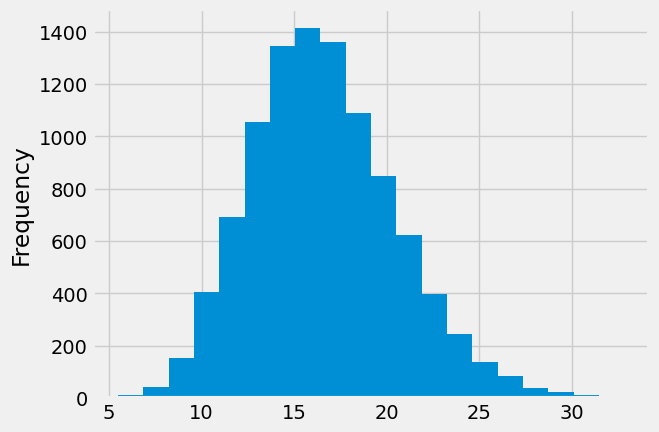

Population Average 16.658155515370705


In [51]:
# Create a DataFrame with the sample means
df = pd.DataFrame({'Mean of 100 flight delays': sample_mean_100})

# Plot a histogram of the sample means with 20 bins
df['Mean of 100 flight delays'].plot(kind='hist',bins = 20)

# Display the plot
plots.show()
print('Population Average',delay_mean)

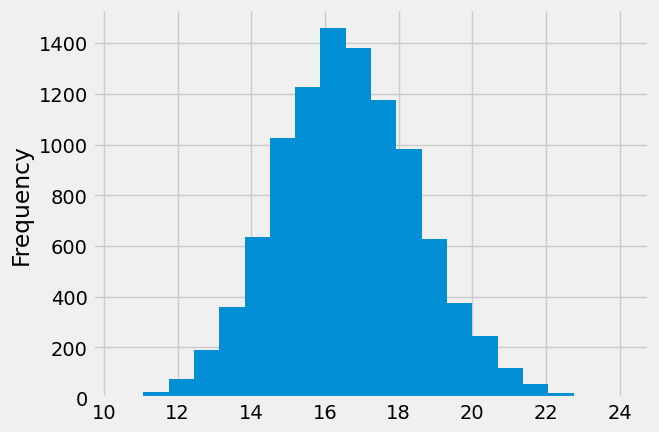

Population Average 16.658155515370705


In [53]:
# Generate sample means for sample size of 400
sample_means_400 = ten_thousand_sample_means(400)

# Create a DataFrame with the sample means
df_400 = pd.DataFrame({'Means of 400 flight delays': sample_means_400})

# Plot a histogram of the sample means with 20 bins
df_400['Means of 400 flight delays'].plot(kind='hist', bins = 20)

# Display the plot
plots.show()

# Print the population average
print('Population Average', delay_mean)

## CLT: Spread

In [54]:
sample_means_900 = ten_thousand_sample_means(900)

In [55]:
# Create a DataFrame with columns for the sample means of size 400 and 900
means_tbl = pd.DataFrame({
    '400': sample_means_400,
    '900': sample_means_900
})


# Display the DataFrame
means_tbl


,400,900
0,18.5150,14.757778
1,14.1775,16.357778
2,15.7325,17.822222
3,20.9275,15.324444
4,17.6200,17.538889
...,...,...
9995,17.9700,16.354444
9996,14.8200,16.478889
9997,17.6200,16.564444
9998,16.1950,17.280000


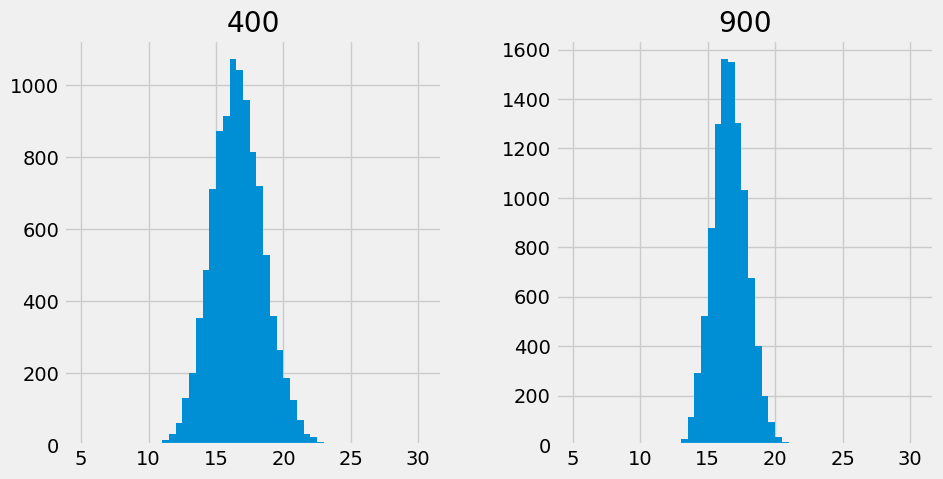

In [57]:


# Plot histograms for the '400' and '900' columns with the specified bins
means_tbl.hist(bins= np.arange(5, 31, 0.5), figsize = (10,5))

# Set the title for the plot
#plots.title('Distribution of Sample Average')

# Display the plot
plots.show()

## Quantifying the Effect of Sample Size

In [58]:

def plot_and_summarize_sample_means(sample_size):
    # Generate the sample means
    sample_means = ten_thousand_sample_means(sample_size)

    # Create a DataFrame for the sample means
    sample_means_df = pd.DataFrame({'Sample Means': sample_means})

    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_df['Sample Means'].plot(kind='hist', bins=20, figsize=(8, 5))

    # Add labels and title
    plots.xlabel('Sample Means')
    plots.title(f'Sample Size {sample_size}')

    # Display the plot
    plots.show()


Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.654381

Population SD: 39.480199851609314
SD of sample means: 3.91902707528782
Ratio: 10.073979866217133


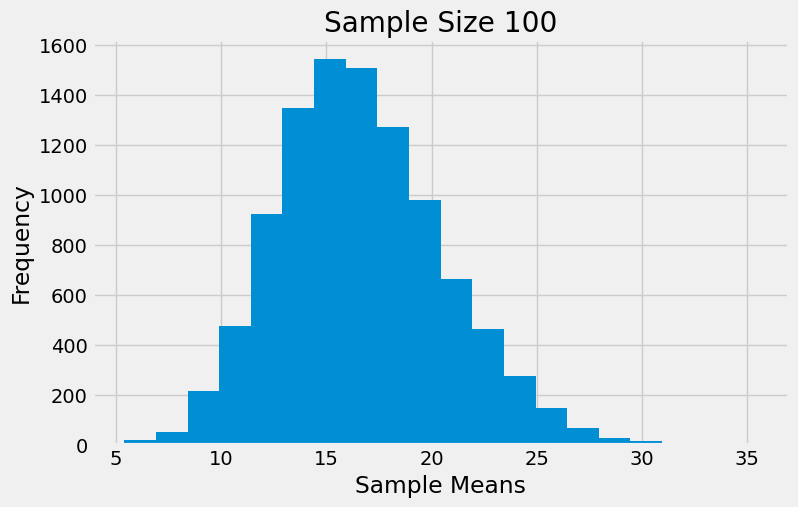

In [59]:
plot_and_summarize_sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.63840525

Population SD: 39.480199851609314
SD of sample means: 1.9316255110391967
Ratio: 20.438847812881356


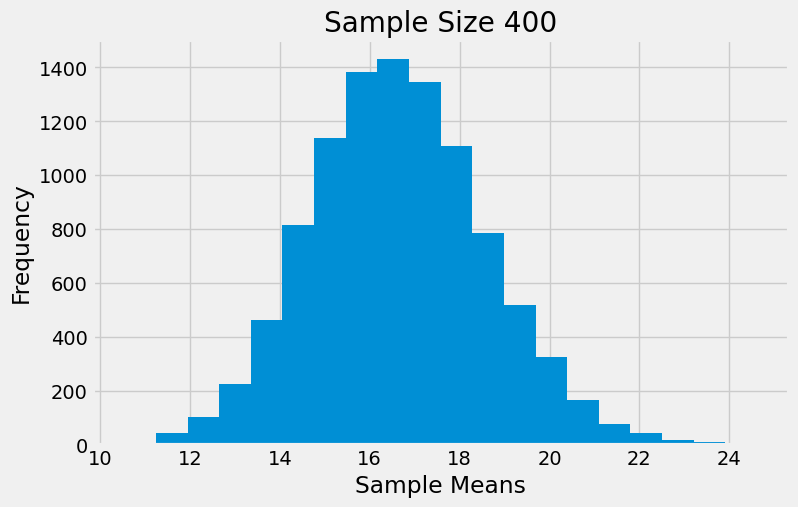

In [60]:
plot_and_summarize_sample_means(400)

Sample size:  1000
Population mean: 16.658155515370705
Average of sample means:  16.6527627

Population SD: 39.480199851609314
SD of sample means: 1.2062404556259543
Ratio: 32.72995833249669


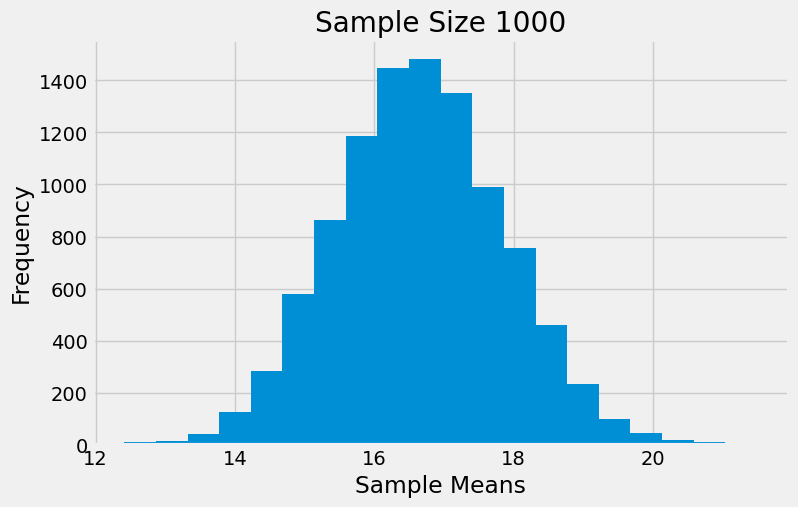

In [61]:
plot_and_summarize_sample_means(1000)